PARNA MISHRA <BR>
60009220201

# LOAN APPROVAL PREDICTION

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("C:/Users/PARNA MISHRA/OneDrive/Documents/Desktop/LOAN-ML/LoanData.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.shape

(614, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# BASIC DATA PROCESSING 

In [13]:
data['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [16]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [18]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

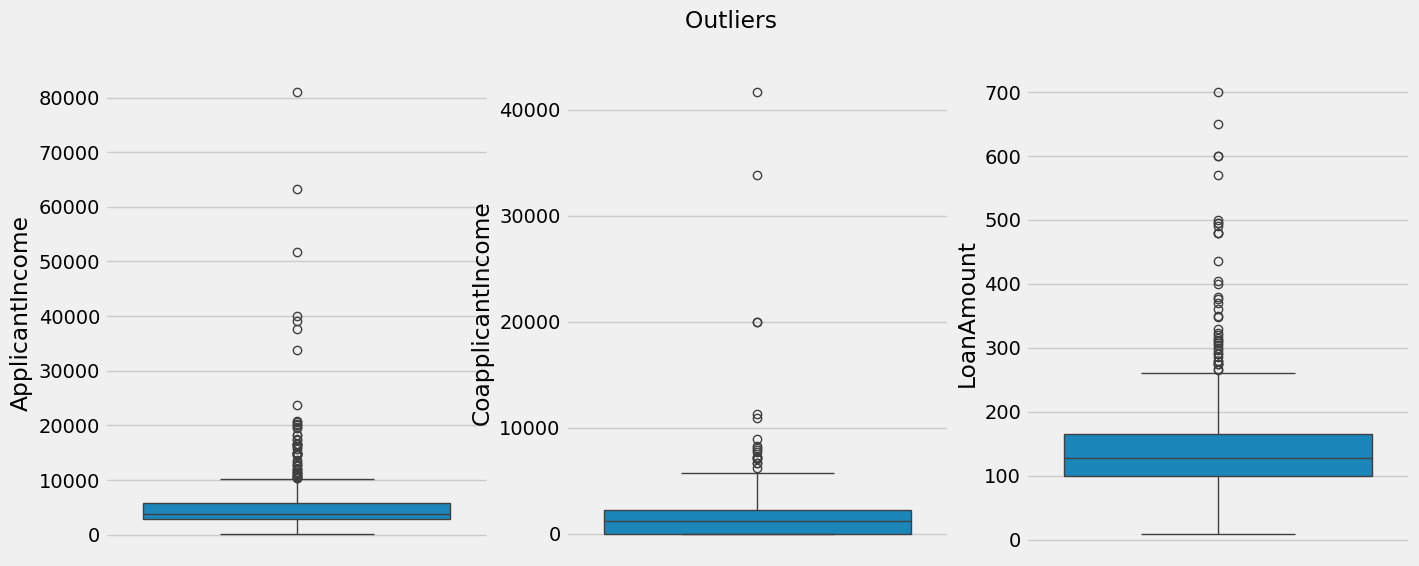

In [19]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers ")
plt.show()

From the above Boxplot we can see that : <br><br>
Applicant Income : <br>
    ->The median income is around 5000<br>
    ->There are a few outliers with incomes above 10000
<br><br>
CoaplicantIncome : <br>
    ->The median income is around 2500<br>
    ->There are a few outliers with incomes above 10000<br>

LoanAmount : <br>
    ->The median loan amount is around 150<br>
    ->There are a few outliers with loan amounts above 500



In [20]:

data = data[data['ApplicantIncome']<25000]
data = data[data['CoapplicantIncome']<12000]
data = data[data['LoanAmount']<400]

In [21]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [22]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<H1>SKEWNESS</H1>

In [23]:
from scipy.stats import skew 
df_cleaned = data.dropna(subset=num)
skewness = {col: skew(df_cleaned[col]) for col in num}

for col, value in skewness.items():
    print(f"Skewness for {col}: {value}")

Skewness for ApplicantIncome: 2.316644498414317
Skewness for CoapplicantIncome: 1.5193280033407812
Skewness for LoanAmount: 1.190935325951286
Skewness for Loan_Amount_Term: -2.4457111925547266
Skewness for Credit_History: -2.0105695842120914


Both ApplicantIncome and CoapplicantIncome show high positive skewness, indicating that most applicants earn below average with few high earners<br>
Positive skewness in LoanAmount suggests most loans are small, with fewer large loans<br>
Negative skewness in Loan_Amount_Term implies most loans are long-term with fewer short-term loans<bR>
Negative skewness in Credit_History indicates most applicants have a good credit history<br>


In [24]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

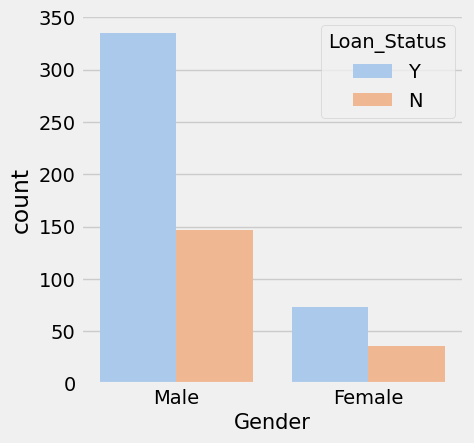

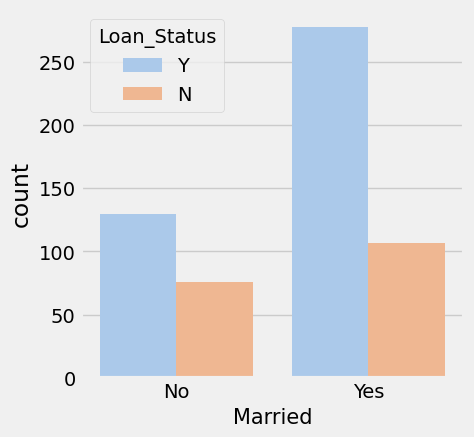

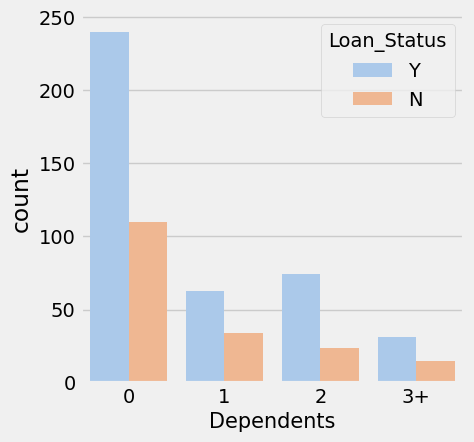

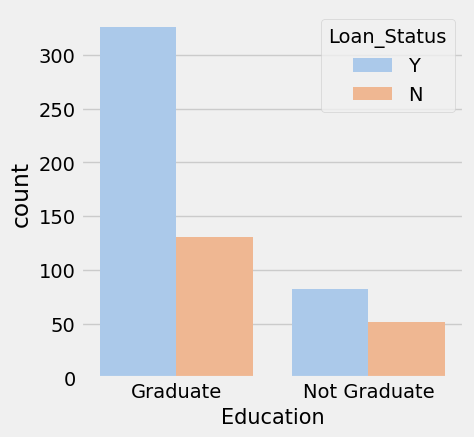

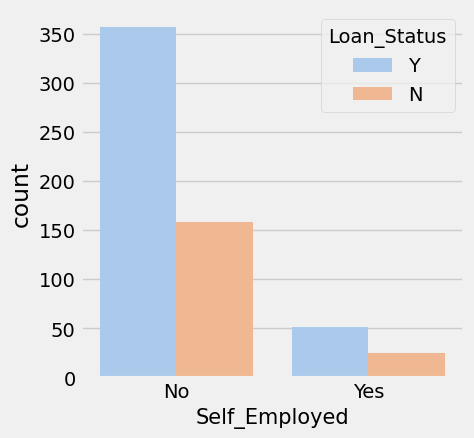

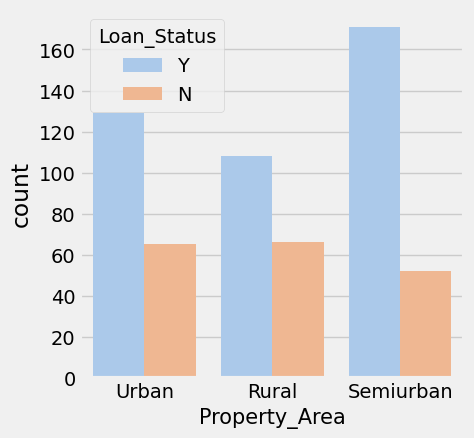

In [25]:
for i in cat[1:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'pastel' )
    plt.xlabel(i, fontsize = 15)


Based on these observations, we can infer that:

* Applicants with higher incomes are more likely to be approved for loans.
* Applicants with co-applicants are more likely to be approved for loans.
* Applicants with higher loan amounts are less likely to be approved for loans.
* Applicants with a credit history are more likely to be approved for loans.
* Applicants who are self-employed are less likely to be approved for loans.
* Applicants who are married are more likely to be approved for loans.
* Applicants with dependents are less likely to be approved for loans.

<Axes: >

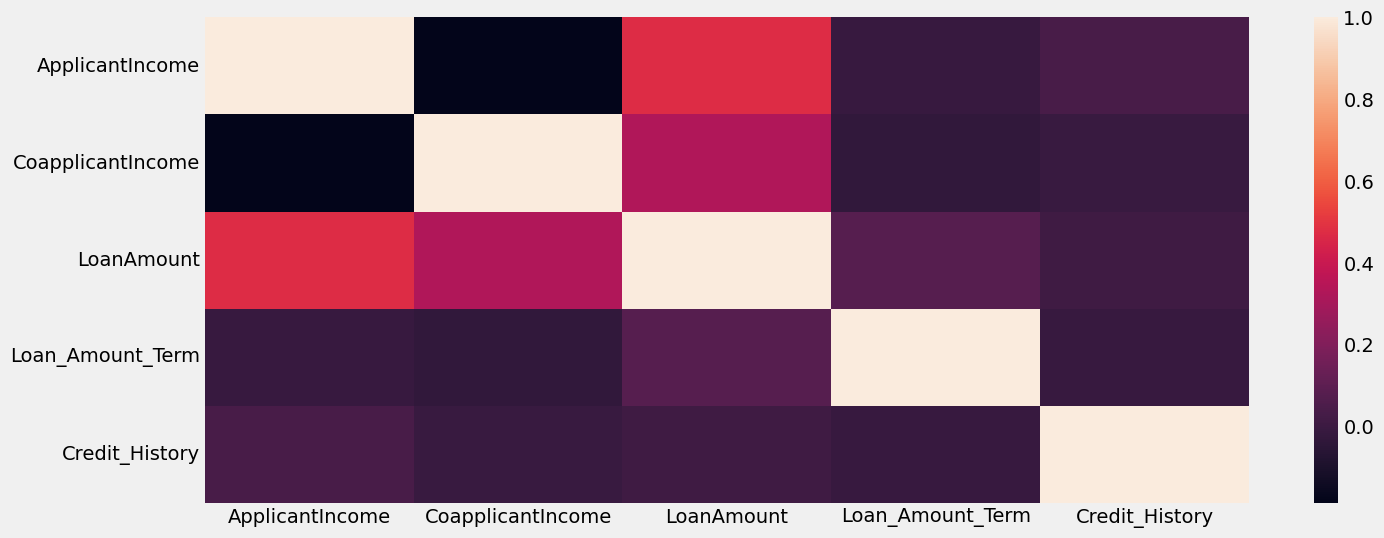

In [26]:
import seaborn as sns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix)


In [27]:
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.187721,0.471382,-0.015154,0.039071
CoapplicantIncome,-0.187721,1.000000,0.327993,-0.032928,-0.008552
LoanAmount,0.471382,0.327993,1.000000,0.077405,0.009865
Loan_Amount_Term,-0.015154,-0.032928,0.077405,1.000000,-0.013574
Credit_History,0.039071,-0.008552,0.009865,-0.013574,1.000000


In [28]:

print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [29]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [30]:
data = data.drop(['Loan_ID'], axis = 1)
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])


In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
data['Dependents'].value_counts()

Dependents
0     350
2      98
1      97
3+     46
Name: count, dtype: int64

In [34]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))

data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))

C:\Users\PARNA MISHRA\AppData\Local\Temp\ipykernel_8736\1090990102.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
C:\Users\PARNA MISHRA\AppData\Local\Temp\ipykernel_8736\1090990102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
C:\Users\PARNA MISHRA\AppData\Local\Temp\ipykernel_8736\1090990102.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1


In [36]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [39]:
target_cols=y.value_counts()

<h1>TARGET COLUMN </h1>

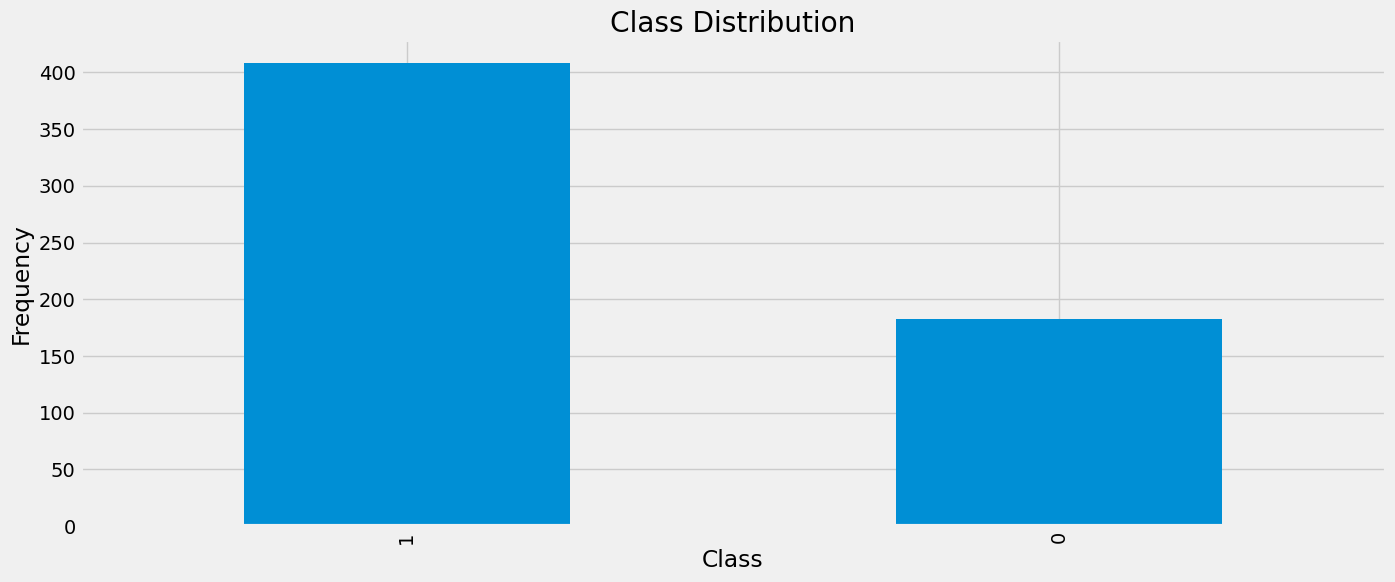

In [40]:
import matplotlib.pyplot as plt
target_cols.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [41]:
imbalance_ratio = target_cols.min() / target_cols.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 0.45


In [112]:
x.shape

(591, 11)

In [113]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [114]:
from imblearn.over_sampling import SMOTE
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [115]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


In [116]:

from sklearn.model_selection import train_test_split


In [117]:
x_train, x_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)


In [118]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
172,1,1,0,0,0,3497,1964.000000,116.000000,360.000000,1.000000,0
48,0,1,0,0,0,2645,3440.000000,120.000000,360.000000,0.000000,1
319,1,1,0,0,1,5818,2160.000000,184.000000,360.000000,1.000000,1
626,1,1,0,0,0,380,1735.331310,130.184246,360.000000,0.862407,0
320,0,1,0,0,0,4333,2451.000000,110.000000,360.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,0,0,0,3128,2116.096127,118.252591,180.000000,0.000000,1
192,0,1,0,0,0,3416,2816.000000,113.000000,360.000000,1.000000,1
629,1,0,0,0,0,6034,0.000000,136.172352,331.770197,0.235248,0
559,1,0,0,0,0,3182,2917.000000,161.000000,360.000000,1.000000,1


In [119]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [120]:
x_train.shape

(652, 11)

In [121]:
y_test.shape

(164,)

<h1>MODEL BUILD AND COMPARING</h1>

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_predictions = dt_classifier.predict(x_test)
dt_score = accuracy_score(y_test, dt_predictions)


rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_score = accuracy_score(y_test, rf_predictions)

lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
lr_predictions = lr_classifier.predict(x_test)
lr_score = accuracy_score(y_test, lr_predictions)


print("Decision Tree score:", dt_score)
print("Random Forest score:", rf_score)
print("Logistic Regression score:", lr_score)



Decision Tree score: 0.7865853658536586
Random Forest score: 0.8597560975609756
Logistic Regression score: 0.7682926829268293


c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


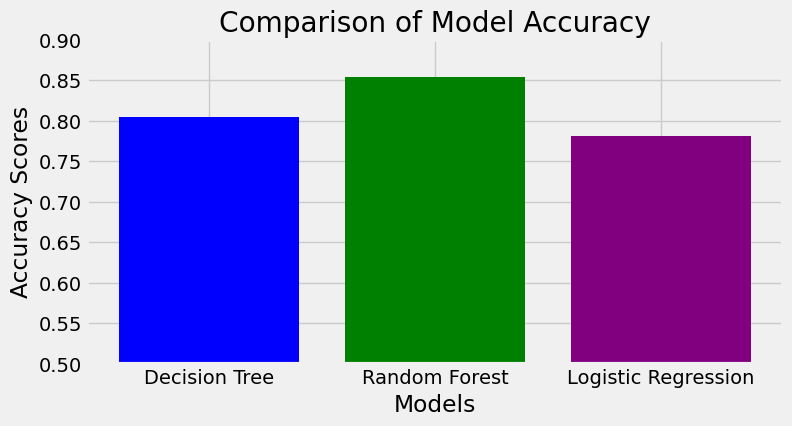

In [123]:

models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
scores = [0.8048780487804879, 0.8536585365853658,0.7804878048780488]

plt.figure(figsize=(8, 4))
plt.bar(models, scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Model Accuracy')
plt.ylim(0.5, 0.9) 
plt.show()


<h1>HYPERPARAMETER TUNING</h1>

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression()

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, verbose=1, scoring='accuracy')
grid_search_lr.fit(x_train, y_train)


print("Best parameters:", grid_search_lr.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_lr.best_score_))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The ma

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.77



From the hyperparameter tuning for Logistic Regression, we can infer the following:

* The optimal value for the regularization strength parameter `C` is 10.
* The optimal norm used in the penalization is `l2`.


These optimal parameters resulted in a best cross-validation score of
approximately 0.77. This means that the Logistic Regression model with these
parameters is able to correctly predict the loan status of approximately 78% of the samples in the cross-validation dataset.

In [125]:

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print("Best parameters:", best_params)


best_model = RandomForestClassifier(**best_params)
best_model.fit(x_train, y_train)
best_predictions = best_model.predict(x_test)
best_score = accuracy_score(y_test, best_predictions)

print("Best score:", best_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8475609756097561


From the hyperparameter tuning for Random Forest, we can infer the following:

* The optimal number of trees in the forest is 200.
* The optimal maximum depth of each tree is 30.
* The optimal minimum number of samples required to split an internal node is 5.

These optimal parameters resulted in a best cross-validation score of
approximately 0.85. This means that the Random Forest model with these
 parameters is able to correctly predict the loan status of approximately
  85% of the samples in the cross-validation dataset.


In [126]:

print("Before hyperparameter tuning:")
print("Random Forest score:", rf_score)
print("Logistic Regression score:", lr_score)

print("\nAfter hyperparameter tuning:")
print("Best Random Forest score:", best_score)
print("Best Logistic Regression score:", grid_search_lr.best_score_)


Before hyperparameter tuning:
Random Forest score: 0.8597560975609756
Logistic Regression score: 0.7682926829268293

After hyperparameter tuning:
Best Random Forest score: 0.8475609756097561
Best Logistic Regression score: 0.7715091015854374


<h1>COMPARING R2 SCORE AND MSME FOR RANDOM FOREST AND LOGISTIC REGRESSION</h1>

In [127]:
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, best_predictions)
r2_rf = r2_score(y_test, best_predictions)
mse_lr = mean_squared_error(y_test, grid_search_lr.predict(x_test))
r2_lr = r2_score(y_test, grid_search_lr.predict(x_test))
print("Random Forest:")
print("MSE:", mse_rf)
print("R-squared:", r2_rf)

print("\nLogistic Regression:")
print("MSE:", mse_lr)
print("R-squared:", r2_lr)


Random Forest:
MSE: 0.1524390243902439
R-squared: 0.3902439024390244

Logistic Regression:
MSE: 0.23170731707317074
R-squared: 0.07317073170731703


Random Forest Model:<br>
MSE (Mean Squared Error): It's lower than Logistic Regression, which means it makes fewer mistakes in predictions.<br>
R-squared: It's higher, indicating it explains the changes in your data better than Logistic Regression.<br><br>
Logistic Regression Model:<Br>
MSE: Slightly higher, indicating more mistakes in predictions than Random Forest.<br>
R-squared: Lower which means it's not as good at explaining why things change in your data compared to Random Forest.<br>
thus,we can say that the Random Forest model performs better than the Logistic Regression model for thes dataset. It predicts more accurately.....

In [128]:

y_pred = rf.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.8597560975609756
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.84      0.89      0.86        82

    accuracy                           0.86       164
   macro avg       0.86      0.86      0.86       164
weighted avg       0.86      0.86      0.86       164



In [129]:
print("Our Model Accuracy is",accuracy_score(y_pred, y_test) )


Our Model Accuracy is 0.8597560975609756


In [130]:
data.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [131]:
data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1


<h1>PREDICTION</h1>

In [132]:
model_pred = np.array([[1, 1, 0, 1, 0, 8.7, 7.5, 150.0, 360, 1, 1]])
prediction = rf.predict(model_pred)
print(prediction[0])

"""
Gender: Male = 1
Married: Yes = 1
Dependents: None = 0
Education: Graduate = 1
Self Employed: No = 0
Applicant Income: 8.7 (scaled/transformed)
Coapplicant Income: 7.5 (scaled/transformed)
Loan Amount: 150.0
Loan Term: 360 months
Credit History: Good = 1
Property Area: Urban = 1

"""

1


c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'\nGender: Male = 1\nMarried: Yes = 1\nDependents: None = 0\nEducation: Graduate = 1\nSelf Employed: No = 0\nApplicant Income: 8.7 (scaled/transformed)\nCoapplicant Income: 7.5 (scaled/transformed)\nLoan Amount: 150.0\nLoan Term: 360 months\nCredit History: Good = 1\nProperty Area: Urban = 1\n\n'

In [133]:

import numpy as np

model_pred = np.array([[1, 1, 1, 1, 1, 1200, 0, 148.0, 360, 0, 1]])

prediction = rf.predict(model_pred)

if prediction == 1:
    print("Loan approved")
else:
    print("Loan not approved")

"""
Gender: Male = 1
Married: Yes = 1
Dependents: One = 1
Education: Graduate = 1
Self Employed: Yes = 1
Applicant Income: 1200
Coapplicant Income: 0
Loan Amount: 148.0
Loan Term: 360 months ( 30-year loan)
Credit History: Bad = 0
Property Area: Urban = 1
"""


Loan not approved


c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'\nGender: Male = 1\nMarried: Yes = 1\nDependents: One = 1\nEducation: Graduate = 1\nSelf Employed: Yes = 1\nApplicant Income: 1200\nCoapplicant Income: 0\nLoan Amount: 148.0\nLoan Term: 360 months ( 30-year loan)\nCredit History: Bad = 0\nProperty Area: Urban = 1\n'

In [134]:
import numpy as np

model_pred= np.array([[1, 1, 0, 1, 0, 5000, 1500, 150, 360, 1, 2]])


prediction = rf.predict(model_pred)

if prediction == 1:
    print("Loan approved")
else:
    print("Loan not approved")
    
"""
Gender: Male = 1
Married: Yes = 1
Dependents: None = 0 
Education: Graduate = 1 
Self Employed: No = 0
Applicant Income: 5000 
Coapplicant Income: 1500 
Loan Amount: 150
Loan Term: 360 months 
Credit History: Good = 1 
Property Area: Semiurban = 2 
"""

Loan approved


c:\Users\PARNA MISHRA\OneDrive\Documents\Desktop\LOAN-ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'\nGender: Male = 1\nMarried: Yes = 1\nDependents: None = 0 \nEducation: Graduate = 1 \nSelf Employed: No = 0\nApplicant Income: 5000 \nCoapplicant Income: 1500 \nLoan Amount: 150\nLoan Term: 360 months \nCredit History: Good = 1 \nProperty Area: Semiurban = 2 \n'

In [135]:
import pickle
with open('loan_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
